In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [9]:
# reading csv file
df = pd.read_csv('data/StudentsPerformance.csv')
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [12]:
X = df.drop('math score',axis=1)

In [16]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [18]:
y = df['math score']

### Coulmn Transformer

In [20]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
print(num_features)
print(cat_features)

Index(['reading score', 'writing score'], dtype='object')
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [21]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [22]:
transformed_col = preprocessor.fit_transform(X)
transformed_col

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [23]:
# Shape of transformed_col
transformed_col.shape

(1000, 19)

In [24]:
# Seperate the dataset for train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_col, y, test_size=0.2, random_state=41)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create a evaluation function

In [36]:
def evaluate_model(true_val, predicted_val):
    mse = mean_squared_error(true_val, predicted_val)
    mae = mean_absolute_error(true_val, predicted_val)
    rmse = np.sqrt(mean_squared_error(true_val, predicted_val))
    r2 = r2_score(true_val, predicted_val)
    return mse, mae, rmse, r2

In [26]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Nearest Regressor": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressoin":XGBRegressor(),
    "Cat Boosting": CatBoostRegressor(verbose=False),
    "AdaBoost": AdaBoostRegressor()
}

In [44]:
model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    # predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # metrices
    model_train_mse, model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mse, model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # print("=======================================================================================================")
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print()

    print('Model performance for Testing set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

    print("========================================================================================================")

    



LinearRegression
Model performance for Training set
- Mean Squared Error: 28.2740
- Root Mean Squared Error: 5.3173
- Mean Absolute Error: 4.2483
- R2 Score: 0.8807

Model performance for Testing set
- Mean Squared Error: 29.1821
- Root Mean Squared Error: 5.4020
- Mean Absolute Error: 4.2772
- R2 Score: 0.8544


Lasso
Model performance for Training set
- Mean Squared Error: 43.2337
- Root Mean Squared Error: 6.5752
- Mean Absolute Error: 5.1826
- R2 Score: 0.8176

Model performance for Testing set
- Mean Squared Error: 40.3913
- Root Mean Squared Error: 6.3554
- Mean Absolute Error: 5.0539
- R2 Score: 0.7984


Ridge
Model performance for Training set
- Mean Squared Error: 28.2532
- Root Mean Squared Error: 5.3154
- Mean Absolute Error: 4.2455
- R2 Score: 0.8808

Model performance for Testing set
- Mean Squared Error: 28.9457
- Root Mean Squared Error: 5.3801
- Mean Absolute Error: 4.2573
- R2 Score: 0.8556


K-Nearest Regressor
Model performance for Training set
- Mean Squared Error: 

In [43]:
r2_list

[0.8543827737460773,
 0.798449840729279,
 0.8555625557681628,
 0.7594049193849796,
 0.6107844639129834,
 0.8095292265986515,
 0.8007270176209718,
 0.828296713382709,
 0.7951945755801115]

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.855563
0,LinearRegression,0.854383
7,Cat Boosting,0.828297
5,RandomForestRegressor,0.808843
6,XGBRegressoin,0.800727
1,Lasso,0.798450
8,AdaBoost,0.792547
3,K-Nearest Regressor,0.759405
4,DecisionTree,0.628149


### Linear Regression

In [46]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.44


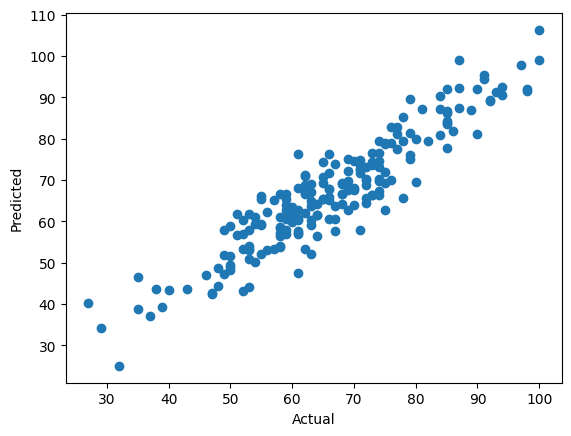

In [47]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

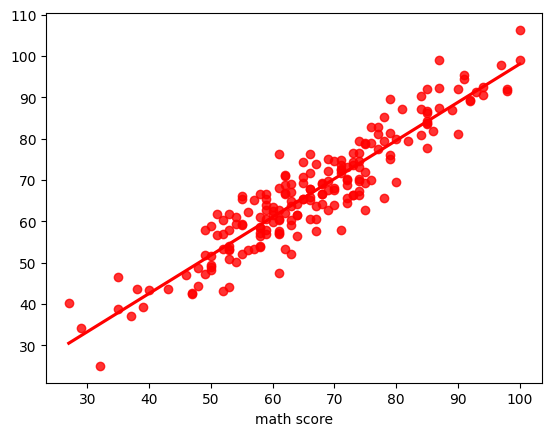

In [48]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');